In [1]:
%store -r X_small y

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

### Naive Bayes

In [17]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracies = []

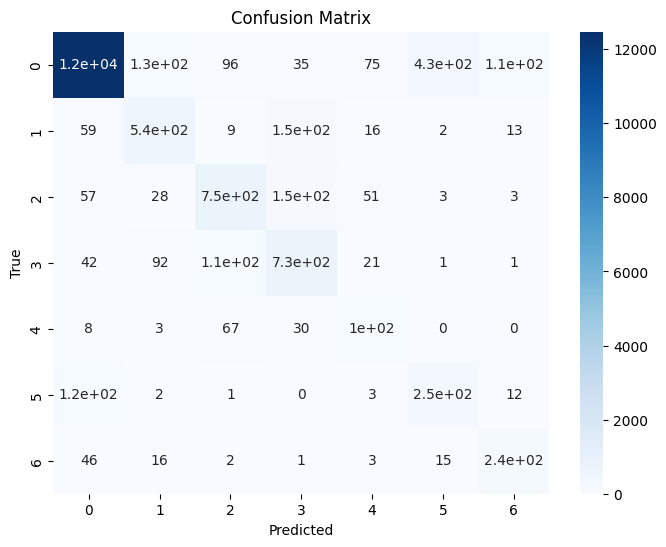

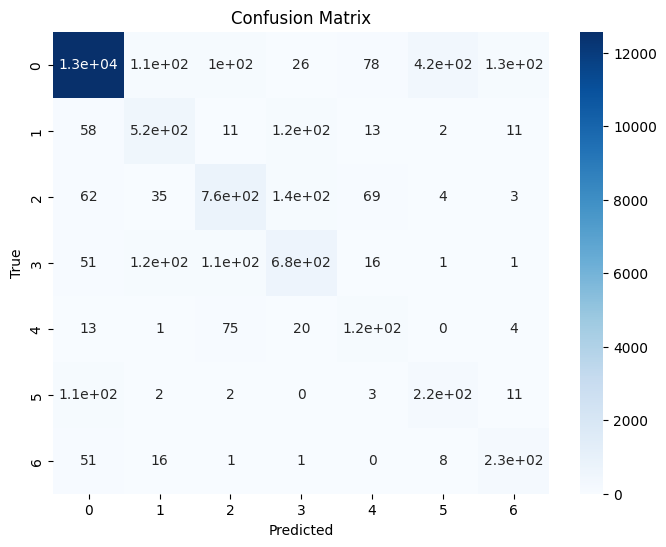

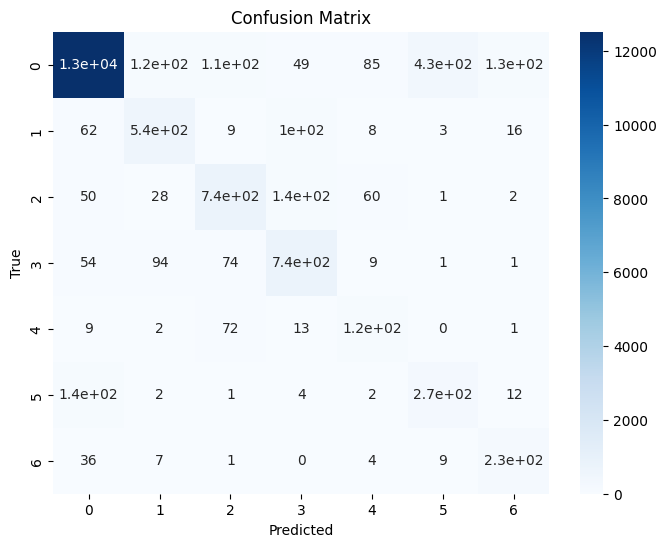

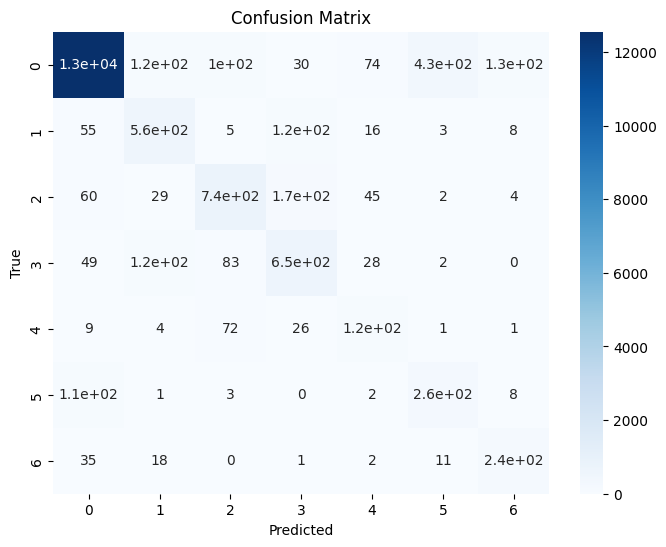

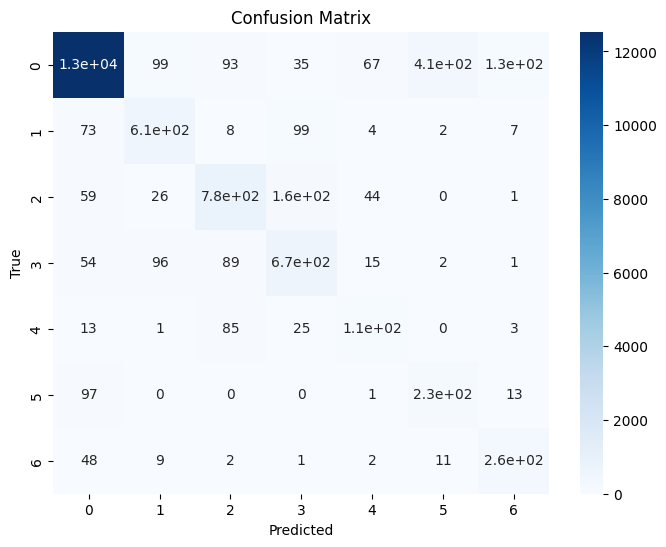

0.999608039855957


In [18]:
start_time = time.time()
for i, (train_index, test_index) in enumerate(kf.split(X_small, y)):
    print(f'{i}/{n_splits}', end='\r')
    X_train, X_test = X_small[train_index], X_small[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_pred, y_test)
    accuracies.append(accuracy)

elapsed_time = time.time() - start_time
print(elapsed_time)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size=0.2, random_state=42)

In [32]:
birds_labels = {
    "other": 0,
    "comcuc": 1,
    "cowpig1": 2,
    "eucdov": 3,
    "eueowl1": 4,
    "grswoo": 5,
    "tawowl1": 6
}

birds = [bird for bird in list(birds_labels.keys())]

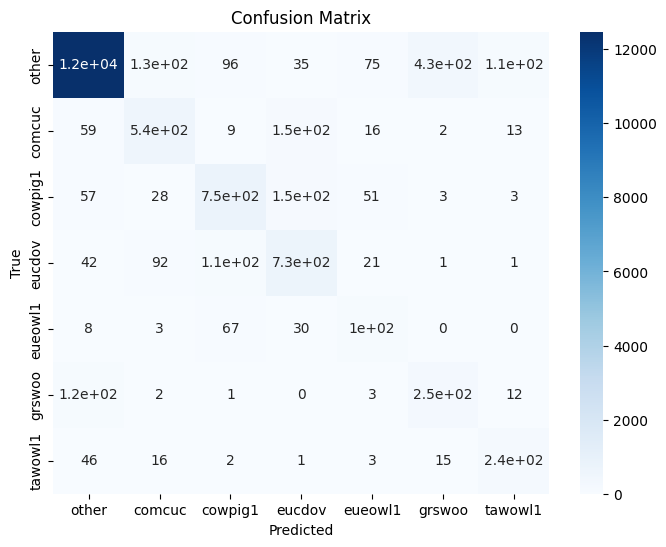

In [33]:
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=birds, yticklabels=birds)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
np.count_nonzero(y == 0)

67006